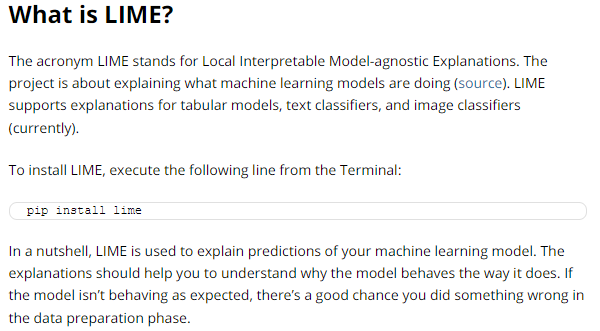

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

wine = pd.read_csv('wine.csv')
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
from sklearn.model_selection import train_test_split

X = wine.drop('quality', axis=1)
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
#model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)

0.659375


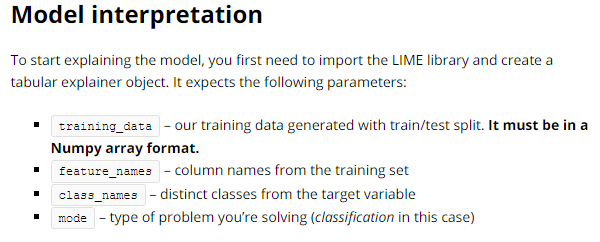

In [36]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
   # class_names=[, 'good'],
    mode='regression')

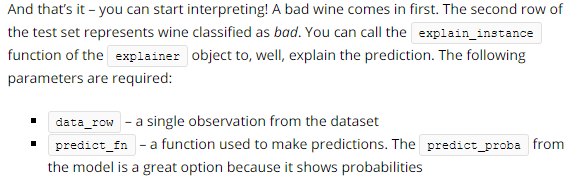

In [37]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], # a single observation from the dataset
    predict_fn=model.predict_proba) # A function used to make prediction

exp.show_in_notebook(show_table=True) # This function shows the prediction interpretation in the notebook environment

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


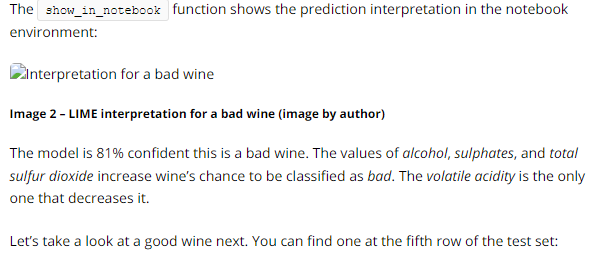

In [18]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[4], 
    predict_fn=model.predict_proba)

exp.show_in_notebook(show_table=True)

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [28]:
print(X_test.iloc[1])
print("y = ",y_test.iloc[1])

fixed acidity             7.800
volatile acidity          0.500
citric acid               0.170
residual sugar            1.600
chlorides                 0.082
free sulfur dioxide      21.000
total sulfur dioxide    102.000
density                   0.996
pH                        3.390
sulphates                 0.480
alcohol                   9.500
Name: 124, dtype: float64
y =  5


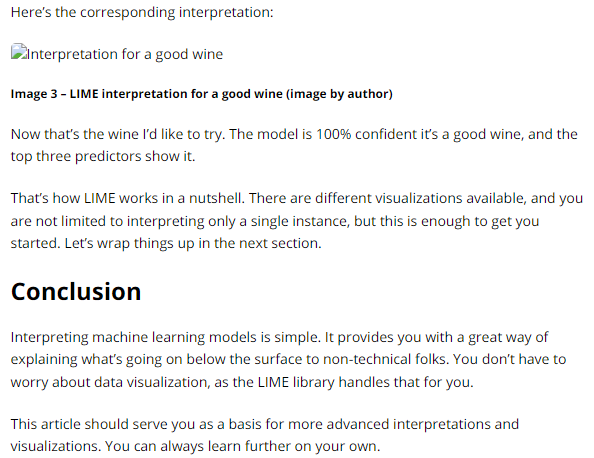

What are your thoughts on LIME? Do you want to see a comparison between LIME and SHAP? We can always compare  **LIME and SHAP**

In [ ]:
################################################################################################################################

## Loading libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

## Loading dataset

In [24]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [25]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Mapping data to 0 and 1

In [27]:
diabetes["diabetes"].map({"neg":0, "pos":1})

KeyError: 'diabetes'

In [6]:
diabetes["diabetes"].value_counts()

0    262
1    130
Name: diabetes, dtype: int64

## Fitting a RF Model

In [7]:
Y = diabetes['diabetes']
X = diabetes[['pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass',
       'pedigree', 'age']]

X_featurenames = X.columns

# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Build the model with the random forest regression algorithm:
model = RandomForestClassifier(max_depth = 20, random_state = 0, n_estimators = 10000)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20, n_estimators=10000, random_state=0)

## Classification Report

In [8]:

y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred, target_names=["Diabetes -ve", "Diabetes +ve"]))

              precision    recall  f1-score   support

Diabetes -ve       0.75      0.86      0.80        50
Diabetes +ve       0.68      0.52      0.59        29

    accuracy                           0.73        79
   macro avg       0.72      0.69      0.70        79
weighted avg       0.73      0.73      0.72        79



## Feature Importance Plot

<Axes: >

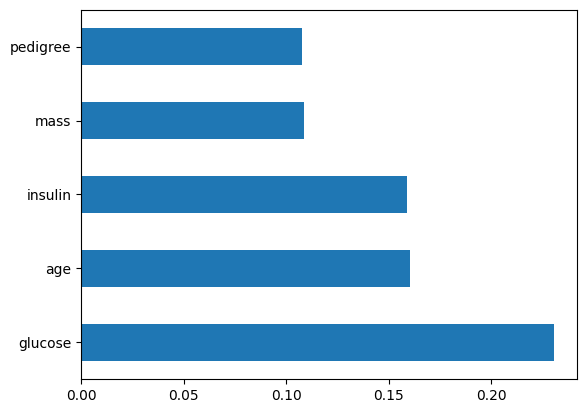

In [9]:
feat_importances = pd.Series(model.feature_importances_, index=X_featurenames)
feat_importances.nlargest(5).plot(kind = 'barh')

## Creating a model explainer

In [10]:
# Ref : https://homes.cs.washington.edu/~marcotcr/blog/lime/

In [11]:
# Lime ..... https://lime-ml.readthedocs.io/en/latest/lime.html
# https://gael-varoquaux.info/interpreting_ml_tuto/content/02_why/04_black_box_interpretation.html


import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names = X_featurenames,
                                                   class_names = ['Diabetes -ve', 'Diabetes +ve'],
                                                   feature_selection = "lasso_path",
                                                   discretize_continuous = True,
                                                   discretizer = "quartile",
# Options are ‘quartile’,‘decile’ or ‘entropy
                                                   # categorical_features=,
                                                   # There is no categorical features in this example, otherwise specify them.
                                                   verbose = True,
                                                    mode = 'classification')

In [12]:
X_test.iloc[0:5]

pregnant  glucose  pressure  triceps  insulin  mass  pedigree  age
31          2      100        66       20       90  32.9     0.867   28
102         9      112        82       32      175  34.2     0.260   36
94          3      107        62       13       48  22.9     0.678   23
363         2       93        64       32      160  38.0     0.674   23
348         3      123       100       35      240  57.3     0.880   22

In [13]:
Y_test.iloc[0:5]

31     1
102    1
94     1
363    1
348    0
Name: diabetes, dtype: int64

## Explain the first observation

C:\Users\aicyb\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.47612448015735975
Prediction_local [-0.04060435]
Right: 0.0123


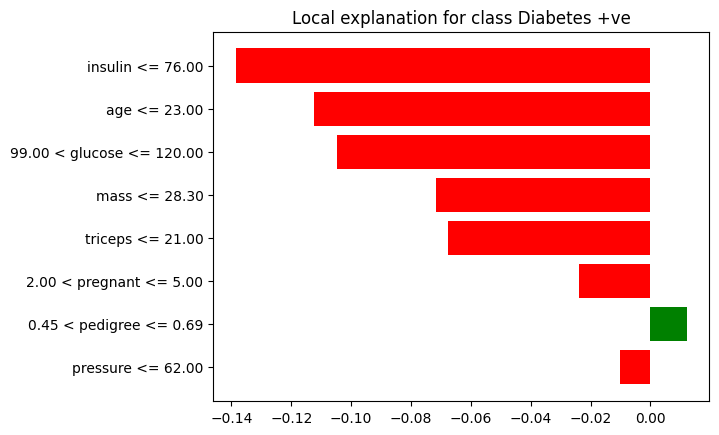

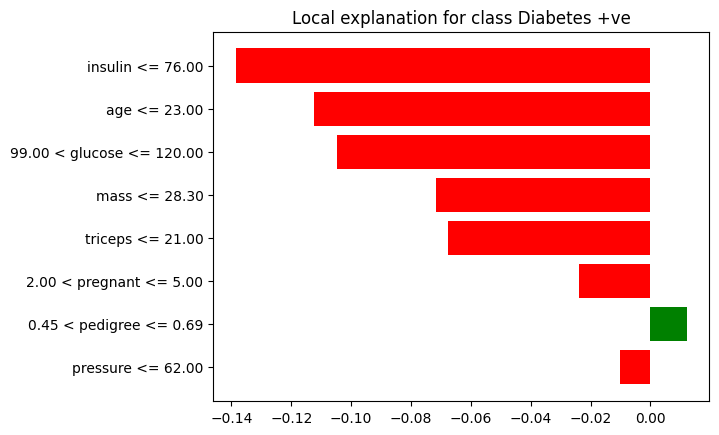

In [32]:
exp = explainer.explain_instance(X_test.iloc[2], model.predict_proba)
exp.as_pyplot_figure()

C:\Users\aicyb\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.296043258037004
Prediction_local [0.5109991]
Right: 0.4134


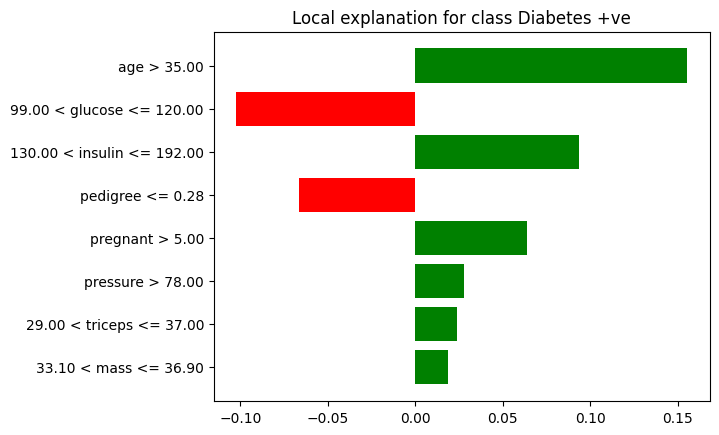

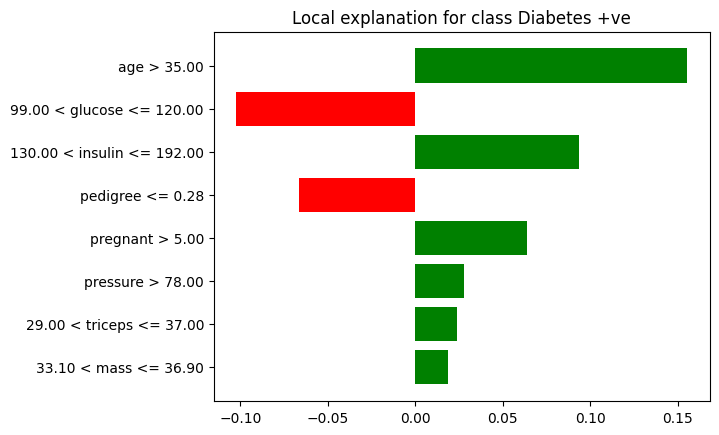

In [35]:
exp = explainer.explain_instance(X_test.iloc[1], model.predict_proba)
exp.as_pyplot_figure()

In [15]:
exp = explainer.explain_instance(X_test.iloc[2], model.predict_proba)
exp.show_in_notebook(show_table=True, show_all=False)

C:\Users\aicyb\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.4910217529631645
Prediction_local [-0.07710943]
Right: 0.0123


In [ ]:
################################################################################################################################

In [80]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [81]:
df = pd.read_csv("d:/data/iris.csv")

In [82]:
df.head()

sepal.length  sepal.width  petal.length  petal.width species
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [83]:
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]

In [85]:
Y = df['species']

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [87]:
class_names = Y.unique()

In [90]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train, Y_train)
model_logreg.predict(X_test)

array(['Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Setosa',
       'Virginica', 'Virginica', 'Virginica', 'Setosa', 'Setosa',
       'Versicolor', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Virginica', 'Virginica',
       'Versicolor', 'Virginica', 'Virginica', 'Versicolor'], dtype=object)

In [91]:
accuracy_score(Y_test,model_logreg.predict(X_test))

0.9111111111111111

In [92]:
ex_specie = np.array(X_test.iloc[8]).reshape(1,-1)

In [93]:
model_logreg.predict(ex_specie)

C:\Users\aicyb\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Setosa'], dtype=object)

In [95]:
import lime
import lime.lime_tabular

In [99]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X, class_names=class_names, discretize_continuous=True)

In [100]:
exp = explainer.explain_instance(X_test.iloc[8],model_logreg.predict_proba,num_features=4,top_labels=1)

C:\Users\aicyb\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [101]:
exp.show_in_notebook(show_table=True, show_all=False)

This enables us to see the results in our notebook as shown in the image below.

Explainer results

From the image above we can see that LIME has given the prediction probability as follows:

setosa with a probability of 0.97.

versicolor with a probability of 0.03.

virginica with a probability of 0.0.

This shows setosa with a higher probability of 0.88 which makes it the right prediction result. The middle of the image provides the rules that must be achieved so that the prediction is setosa.

The rules are as follows:

petal_length >= 1.50

sepal_width > 3.30

sepal_length <= 5.10

According to the right side of the image, all these rules are met. The right side of the image gives the dimensions of our input features.

Using this visual representation, we can see that our model made the right prediction. This shows we now can trust this model.

In [ ]:
################################################################################################################################